In [1]:
#There should not be multicollinearity in regression model.
#Multicollinearity generally occurs when there are high correlations
#between two or more independent variables

In [2]:
#Objective: To predict the profit made by a startup on the basis of
#expenses incurred and the state where they operate

In [3]:
#Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
from numpy import math

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [6]:
#Importing the dataset
dataset = pd.read_csv('C:/Users/DELL/Documents/DataScienceDoc/50_Startups.csv')

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset.shape

(50, 5)

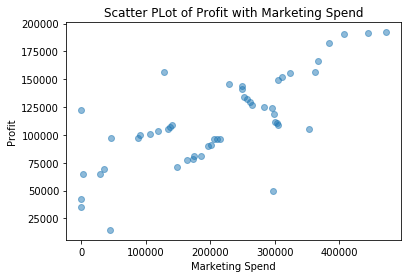

In [9]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter PLot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [10]:
#From the plot, there is a fairly linear relationship between  profit and marketing spend

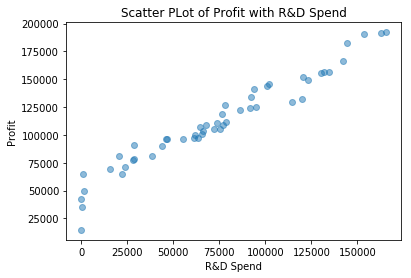

In [11]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter PLot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [12]:
#From the plot, there is a strong linear relationship between R&D and Profit

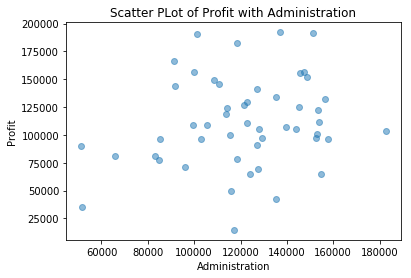

In [13]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter PLot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

In [14]:
#The linear relationship here is very poor

In [15]:
#Create dummy variables for the categorical variable state
dataset['NewYork_State'] = np.where(dataset['State'] == 'New York', 1, 0)
dataset['California_State'] = np.where(dataset['State'] == 'California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State'] == 'Florida', 1, 0)

#Drop the original column state from the dataframe
dataset.drop(columns = ['State'], axis = 1, inplace = True)

In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [17]:
dependent_variable = 'Profit'

In [18]:
#Create a list of independable variables
independent_variables = dataset.columns.tolist()

In [19]:
independent_variables.remove(dependent_variable)

In [20]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [21]:
#Create the data of independent variables
x = dataset[independent_variables].values

#Create the dependent variable data
y = dataset[dependent_variable].values

In [22]:
#Splitting the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [23]:
#Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
x_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [25]:
#Fitting the multiple linear regression to the trainig set
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#Predicting the Test Set results
y_pred = regressor.predict(x_test)


In [27]:
math.sqrt(mean_squared_error(y_test, y_pred))

9493.860397474256

In [28]:
r2_score(y_test, y_pred)

0.9295222630754185

In [36]:
prednow = regressor.predict([[165349.2,136897.8,471784.1, 1,0,0]])

In [39]:
prednow

array([3.04806108e+10])